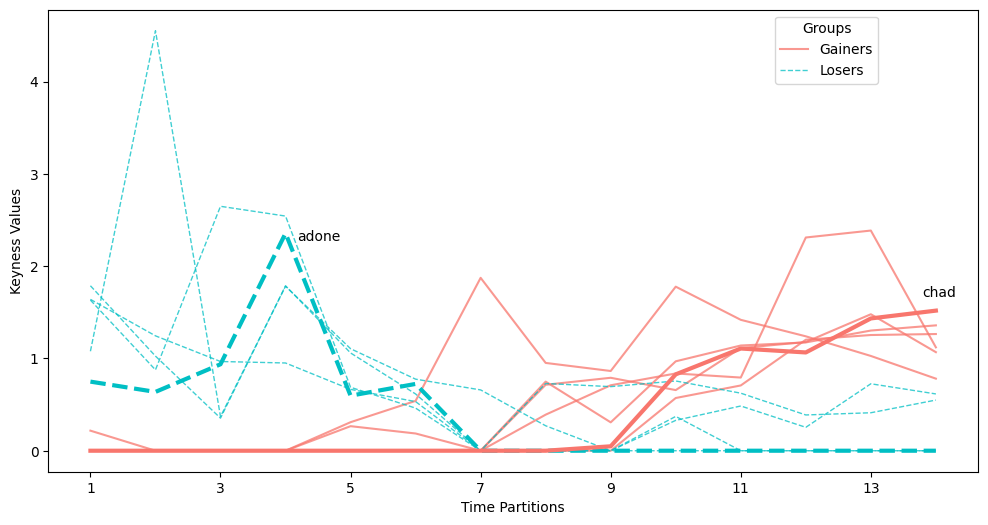

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/home/pgajo/working/incels/diachronic study/fdb_terms_diachronic_study_line_chart.csv', index_col='Item')

# Separate gainers and losers
gainers = data[data['Group'] == 'gainer'].drop(columns=['Group'])
losers = data[data['Group'] == 'loser'].drop(columns=['Group'])

# Separate 'adone' from 'losers'
adone = losers.loc[losers.index == 'adone']
losers = losers.loc[losers.index != 'adone']

# Separate 'chad' from 'gainers'
chad = gainers.loc[gainers.index == 'chad']
gainers = gainers.loc[gainers.index != 'chad']

# Plot the line chart
ax = gainers.T.plot(figsize=(12, 6), color='#f8766d', linestyle='-', alpha=0.75)
losers.T.plot(ax=ax, color='#00bfc4', linestyle='--', linewidth=1, alpha=0.75)

# Plot the 'adone' line with a different linewidth
adone_line = adone.T.plot(ax=ax, color='#00bfc4', linestyle='--', linewidth=3)

# Plot the 'chad' line with a different linewidth
chad_line = chad.T.plot(ax=ax, color='#f8766d', linestyle='-', linewidth=3)

# Customize the chart
plt.xlabel('Time Partitions')
plt.ylabel('Keyness Values')

# Annotate 'adone' and 'chad' in the plot
ax.annotate('adone', xy=(adone_line.get_lines()[-1].get_xdata()[-1], adone_line.get_lines()[-1].get_ydata()[-1]), 
            xytext=(-460,50), textcoords='offset points')
ax.annotate('chad', xy=(chad_line.get_lines()[-1].get_xdata()[-1], chad_line.get_lines()[-1].get_ydata()[-1]), 
            xytext=(-10,10), textcoords='offset points')

# Create legend handles and display the legend
red_line = plt.Line2D([], [], color='#f8766d', label='Gainers', linestyle='-', alpha=0.75)
blue_line = plt.Line2D([], [], color='#00bfc4', label='Losers', linestyle='--', linewidth=1, alpha=0.75)
plt.legend(handles=[red_line, blue_line], title='Groups', loc='upper right', bbox_to_anchor=(0.9, 1))
plt.savefig('/home/pgajo/working/incels/images_tables/other/keyness_chart_fdb.pdf', bbox_inches='tight')
# Display the chart
plt.show()
